# K-Nearest Neighbors (KNN) Classifier from Scratch

## Overview
This notebook implements the K-Nearest Neighbors (KNN) algorithm from scratch using only NumPy and basic Python libraries. KNN is a simple, intuitive, and powerful classification algorithm that makes predictions based on the similarity of data points.

## Algorithm Fundamentals
**K-Nearest Neighbors** is a lazy learning algorithm that:
1. **Stores all training data** without building an explicit model
2. **Finds k closest neighbors** to a query point using distance metrics
3. **Makes predictions** using majority voting among neighbors
4. **Requires no training phase** - all computation happens during prediction

## Key Concepts Implemented
- **Distance Metrics**: Euclidean (L2) distance for measuring similarity
- **Neighbor Selection**: Efficient sorting and selection of k nearest points
- **Majority Voting**: Democratic decision-making among neighboring classes
- **Cross-Validation**: Train/test splitting for performance evaluation

## Dataset: Iris Flower Classification
We'll use a realistic Iris-like dataset with:
- **150 samples** across 3 flower species
- **4 features**: Sepal Length, Sepal Width, Petal Length, Petal Width
- **3 classes**: Setosa, Versicolor, Virginica
- **Realistic patterns**: Based on actual botanical measurements

## Educational Goals
- Understand the mathematical foundation of KNN
- Implement distance calculations and neighbor selection
- Apply KNN to a multi-class classification problem
- Evaluate performance with different k values
- Learn about the algorithm's strengths and limitations

In [83]:
# =============================================================================
# ESSENTIAL IMPORTS FOR KNN IMPLEMENTATION
# =============================================================================
# Core libraries for mathematical operations and basic functionality

import math       # For mathematical functions like sqrt()
import numpy as np  # For efficient array operations and numerical computing

In [84]:
def l2_distance(point1, point2):
    """
    Calculate the Euclidean (L2) distance between two points.
    
    The L2 distance is the most common distance metric for KNN:
    d = sqrt((x1-x2)² + (y1-y2)² + ... + (n1-n2)²)
    
    This measures the "straight-line" distance between points in n-dimensional space.
    It's sensitive to all features equally and works well when features are on 
    similar scales or properly normalized.
    
    Parameters:
    point1, point2: Array-like objects (lists, tuples, numpy arrays)
                   representing coordinates in n-dimensional space
    
    Returns:
    float: The Euclidean distance between the two points
    
    Example:
    l2_distance([0, 0], [3, 4]) = 5.0  (classic 3-4-5 triangle)
    """
    # Calculate squared differences for each dimension
    squares = [(p - q)**2 for p, q in zip(point1, point2)]
    
    # Sum the squares and take the square root
    return math.sqrt(sum(squares))

In [85]:
# =============================================================================
# TESTING THE L2 DISTANCE FUNCTION
# =============================================================================
# Create sample points to verify our distance function works correctly

# Test points in 3D space for distance calculation verification
point1 = np.array([1, 2, 6])    # First point: (1, 2, 6)
point2 = np.array([3, 22, 1])   # Second point: (3, 22, 1) - should be far apart
point3 = np.array([1, 2, 3])    # Third point: (1, 2, 3) - closer to point1

In [86]:
# Test the distance function with our sample points
# Expected: Large distance due to significant difference in y-coordinates (2 vs 22)
l2_distance(point1, point2)

20.71231517720798

In [87]:
# Additional test with 4D points to verify the function works in higher dimensions
p1 = np.array([0, 1, 0, 2])     # 4D point 1
p2 = np.array([11, -3, 4, 2])   # 4D point 2 (large difference in x-coordinate)
print(f"Distance in 4D space: {l2_distance(p1, p2):.3f}")

Distance in 4D space: 12.369


In [88]:
# Debug: Show the squared differences to understand the distance calculation
# This helps verify our distance function is working correctly
print("Squared differences for each dimension:", [(p-q)**2 for p, q in zip(point1, point2)])

Squared differences for each dimension: [np.int64(4), np.int64(400), np.int64(25)]


In [89]:
# Test with 2D points (tuples) to verify function works with different data types
pnt1 = (1, 2)  # 2D point as tuple
pnt2 = (4, 6)  # 2D point as tuple
print(f"Distance between 2D points: {l2_distance(pnt1, pnt2):.3f}")

# This should give us sqrt((4-1)² + (6-2)²) = sqrt(9 + 16) = sqrt(25) = 5.0

Distance between 2D points: 5.000


In [90]:
# Import Counter for majority voting in KNN classification
# Counter is essential for determining the most common class among k neighbors
from collections import Counter

In [91]:
def knn(data, query, k, distance_fn):
    """
    K-Nearest Neighbors classifier implementation.
    
    Parameters:
    data: List of training examples, each example is [feature1, feature2, ..., label]
    query: Query point to classify [feature1, feature2, ...]
    k: Number of nearest neighbors to consider
    distance_fn: Function to calculate distance between points
    
    Returns:
    Predicted label for the query point
    """
    neighbor_distances_and_indices = []
    
    # Calculate distance from query to each training example
    for idx, example in enumerate(data):
        distance = distance_fn(example[:-1], query)  # Exclude the label (last element)
        neighbor_distances_and_indices.append((distance, idx))  # Fixed: added parentheses
    
    # Sort by distance (closest first)
    sorted_neighbor_distances_and_indices = sorted(neighbor_distances_and_indices)
    
    # Get k nearest neighbors
    k_nearest_neighbors_and_indices = sorted_neighbor_distances_and_indices[:k]
    
    # Extract labels of k nearest neighbors
    k_nearest_labels = [data[i][-1] for distance, i in k_nearest_neighbors_and_indices]  # Fixed: use -1 for label
    
    # Return the most common label (majority vote)
    majority_label = Counter(k_nearest_labels).most_common(1)
    return majority_label[0][0]

In [92]:
# Testing Counter functionality - this is crucial for KNN's majority voting
# Counter counts the frequency of each element and helps find the most common one
c = Counter([1, 2, 3, 1, 4, 5, 3, 2, 1, 1, 5, 5, 5, 5, 5, 3])

In [93]:
# Get the most common element (majority vote)
# most_common(3) returns top 3 elements, [0][0] gets the most frequent element
print(f"Most common element (majority vote): {c.most_common(3)[0][0]}")
print(f"All counts: {c.most_common()}")  # Show all elements with their counts

Most common element (majority vote): 5
All counts: [(5, 6), (1, 4), (3, 3), (2, 2), (4, 1)]


In [94]:
# =============================================================================
# REALISTIC DATASET: IRIS FLOWER CLASSIFICATION
# =============================================================================
# We'll create a realistic dataset based on the famous Iris dataset
# Features: Sepal Length, Sepal Width, Petal Length, Petal Width
# Classes: Setosa, Versicolor, Virginica

import random
import matplotlib.pyplot as plt

# Set random seed for reproducibility
random.seed(42)
np.random.seed(42)

# Create realistic Iris-like dataset
def generate_iris_like_data():
    """Generate a realistic Iris-like dataset with known patterns"""
    data = []
    
    # Class 0: Setosa (small flowers, easy to distinguish)
    print("Generating Setosa samples...")
    for i in range(50):
        sepal_length = np.random.normal(5.0, 0.35)  # Around 5.0cm
        sepal_width = np.random.normal(3.4, 0.38)   # Around 3.4cm
        petal_length = np.random.normal(1.5, 0.17)  # Around 1.5cm (small)
        petal_width = np.random.normal(0.25, 0.1)   # Around 0.25cm (small)
        data.append([sepal_length, sepal_width, petal_length, petal_width, 'Setosa'])
    
    # Class 1: Versicolor (medium flowers)
    print("Generating Versicolor samples...")
    for i in range(50):
        sepal_length = np.random.normal(5.9, 0.5)   # Around 5.9cm
        sepal_width = np.random.normal(2.8, 0.3)    # Around 2.8cm
        petal_length = np.random.normal(4.3, 0.47)  # Around 4.3cm (medium)
        petal_width = np.random.normal(1.3, 0.2)    # Around 1.3cm (medium)
        data.append([sepal_length, sepal_width, petal_length, petal_width, 'Versicolor'])
    
    # Class 2: Virginica (large flowers)
    print("Generating Virginica samples...")
    for i in range(50):
        sepal_length = np.random.normal(6.6, 0.64)  # Around 6.6cm
        sepal_width = np.random.normal(3.0, 0.32)   # Around 3.0cm  
        petal_length = np.random.normal(5.6, 0.55)  # Around 5.6cm (large)
        petal_width = np.random.normal(2.0, 0.27)   # Around 2.0cm (large)
        data.append([sepal_length, sepal_width, petal_length, petal_width, 'Virginica'])
    
    return data

# Generate the dataset
iris_data = generate_iris_like_data()

print("\n=== DATASET CREATED ===")
print(f"Total samples: {len(iris_data)}")
print("Features: Sepal Length, Sepal Width, Petal Length, Petal Width")
print("Classes: Setosa, Versicolor, Virginica")

# Display some sample data
print("\n=== SAMPLE DATA ===")
print(f"{'Sepal L':<8} {'Sepal W':<8} {'Petal L':<8} {'Petal W':<8} {'Class':<10}")
print("-" * 50)
for i in range(0, len(iris_data), 15):  # Show every 15th sample
    sample = iris_data[i]
    print(f"{sample[0]:<8.2f} {sample[1]:<8.2f} {sample[2]:<8.2f} {sample[3]:<8.2f} {sample[4]:<10}")

print("\nRealistic Iris-like dataset ready for KNN testing!")

Generating Setosa samples...
Generating Versicolor samples...
Generating Virginica samples...

=== DATASET CREATED ===
Total samples: 150
Features: Sepal Length, Sepal Width, Petal Length, Petal Width
Classes: Setosa, Versicolor, Virginica

=== SAMPLE DATA ===
Sepal L  Sepal W  Petal L  Petal W  Class     
--------------------------------------------------
5.17     3.35     1.61     0.40     Setosa    
4.83     3.33     1.31     0.13     Setosa    
5.28     3.05     1.74     0.11     Setosa    
5.22     3.07     1.32     0.30     Setosa    
5.50     2.77     4.54     1.47     Versicolor
5.49     2.63     4.65     1.42     Versicolor
6.16     3.26     4.25     1.38     Versicolor
7.92     3.56     5.46     2.26     Virginica 
6.52     2.69     4.72     2.05     Virginica 
7.13     2.64     5.89     2.39     Virginica 

Realistic Iris-like dataset ready for KNN testing!


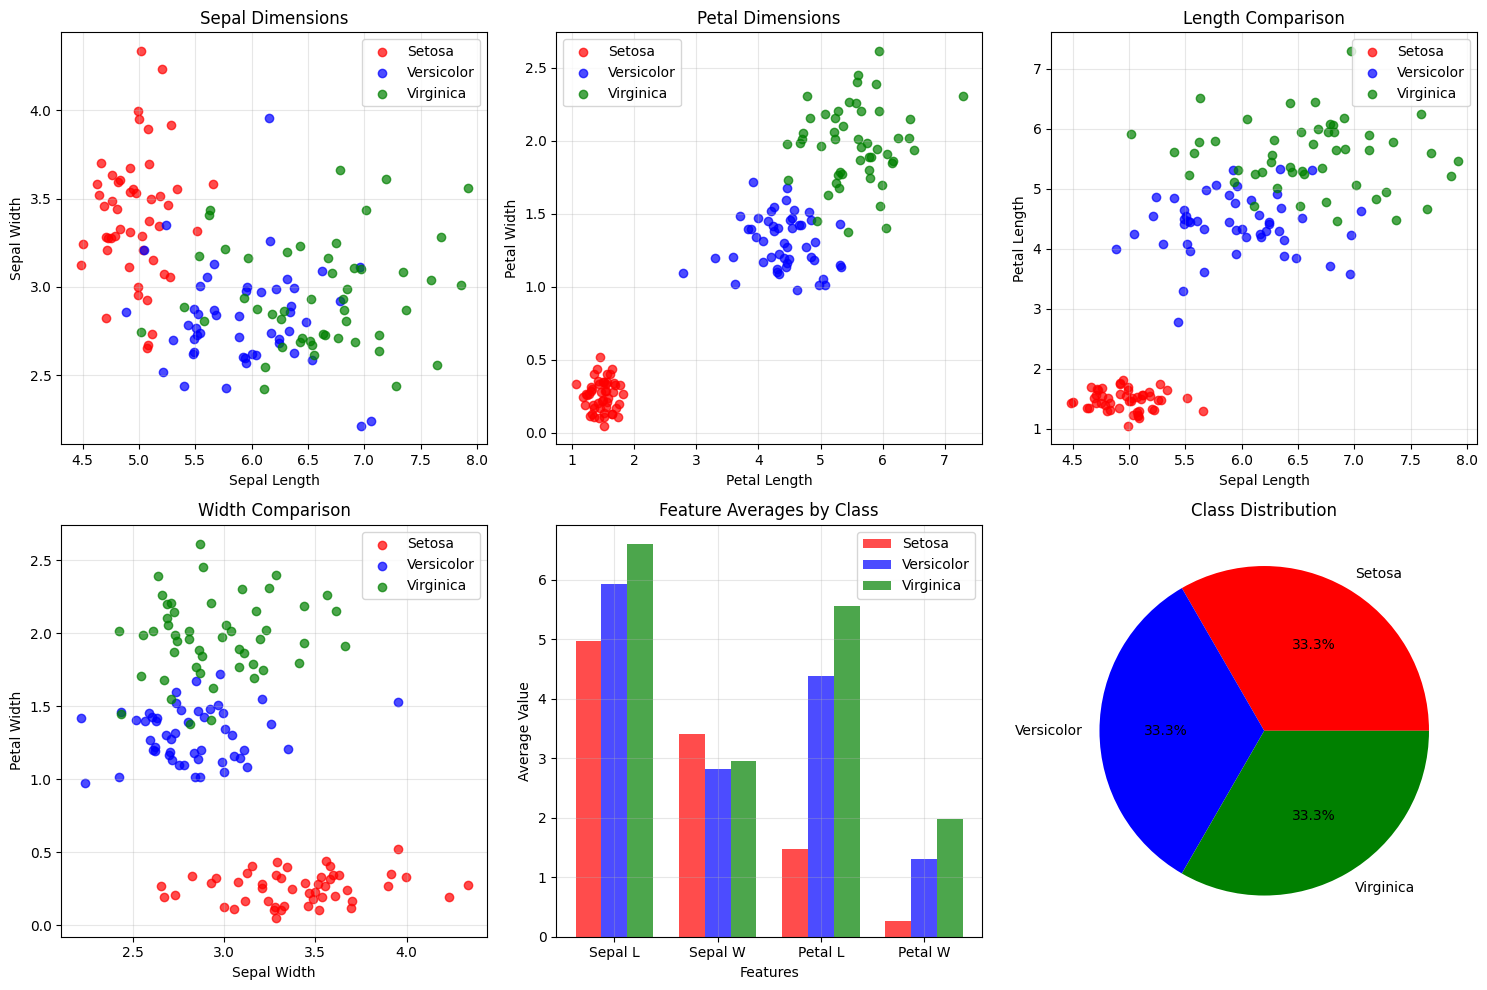

Dataset visualization shows clear patterns that KNN should be able to detect!


In [95]:
# =============================================================================
# DATASET VISUALIZATION
# =============================================================================
# Let's visualize the dataset to understand the patterns

# Separate data by class for plotting
setosa_data = [sample for sample in iris_data if sample[4] == 'Setosa']
versicolor_data = [sample for sample in iris_data if sample[4] == 'Versicolor']  
virginica_data = [sample for sample in iris_data if sample[4] == 'Virginica']

# Extract features for plotting
setosa_features = np.array([[s[0], s[1], s[2], s[3]] for s in setosa_data])
versicolor_features = np.array([[s[0], s[1], s[2], s[3]] for s in versicolor_data])
virginica_features = np.array([[s[0], s[1], s[2], s[3]] for s in virginica_data])

# Create visualization
plt.figure(figsize=(15, 10))

# Plot 1: Sepal Length vs Sepal Width
plt.subplot(2, 3, 1)
plt.scatter(setosa_features[:, 0], setosa_features[:, 1], c='red', label='Setosa', alpha=0.7)
plt.scatter(versicolor_features[:, 0], versicolor_features[:, 1], c='blue', label='Versicolor', alpha=0.7)
plt.scatter(virginica_features[:, 0], virginica_features[:, 1], c='green', label='Virginica', alpha=0.7)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Sepal Dimensions')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Petal Length vs Petal Width
plt.subplot(2, 3, 2)
plt.scatter(setosa_features[:, 2], setosa_features[:, 3], c='red', label='Setosa', alpha=0.7)
plt.scatter(versicolor_features[:, 2], versicolor_features[:, 3], c='blue', label='Versicolor', alpha=0.7)
plt.scatter(virginica_features[:, 2], virginica_features[:, 3], c='green', label='Virginica', alpha=0.7)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Petal Dimensions')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 3: Sepal Length vs Petal Length
plt.subplot(2, 3, 3)
plt.scatter(setosa_features[:, 0], setosa_features[:, 2], c='red', label='Setosa', alpha=0.7)
plt.scatter(versicolor_features[:, 0], versicolor_features[:, 2], c='blue', label='Versicolor', alpha=0.7)
plt.scatter(virginica_features[:, 0], virginica_features[:, 2], c='green', label='Virginica', alpha=0.7)
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.title('Length Comparison')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 4: Sepal Width vs Petal Width
plt.subplot(2, 3, 4)
plt.scatter(setosa_features[:, 1], setosa_features[:, 3], c='red', label='Setosa', alpha=0.7)
plt.scatter(versicolor_features[:, 1], versicolor_features[:, 3], c='blue', label='Versicolor', alpha=0.7)
plt.scatter(virginica_features[:, 1], virginica_features[:, 3], c='green', label='Virginica', alpha=0.7)
plt.xlabel('Sepal Width')
plt.ylabel('Petal Width')
plt.title('Width Comparison')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 5: Feature distributions
plt.subplot(2, 3, 5)
feature_names = ['Sepal L', 'Sepal W', 'Petal L', 'Petal W']
setosa_means = np.mean(setosa_features, axis=0)
versicolor_means = np.mean(versicolor_features, axis=0)
virginica_means = np.mean(virginica_features, axis=0)

x = np.arange(len(feature_names))
width = 0.25

plt.bar(x - width, setosa_means, width, label='Setosa', color='red', alpha=0.7)
plt.bar(x, versicolor_means, width, label='Versicolor', color='blue', alpha=0.7)
plt.bar(x + width, virginica_means, width, label='Virginica', color='green', alpha=0.7)

plt.xlabel('Features')
plt.ylabel('Average Value')
plt.title('Feature Averages by Class')
plt.xticks(x, feature_names)
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 6: Class distribution
plt.subplot(2, 3, 6)
class_counts = [len(setosa_data), len(versicolor_data), len(virginica_data)]
class_names = ['Setosa', 'Versicolor', 'Virginica']
colors = ['red', 'blue', 'green']

# Fixed: removed alpha parameter which is not supported by plt.pie()
plt.pie(class_counts, labels=class_names, colors=colors, autopct='%1.1f%%')
plt.title('Class Distribution')

plt.tight_layout()
plt.show()

print("Dataset visualization shows clear patterns that KNN should be able to detect!")

In [96]:
# =============================================================================
# KNN TESTING WITH REALISTIC DATA
# =============================================================================
# Now let's test our KNN function with the realistic Iris dataset

# Split data into training and testing sets
def train_test_split(data, test_ratio=0.3):
    """Simple train/test split"""
    random.shuffle(data)  # Shuffle the data
    split_index = int(len(data) * (1 - test_ratio))
    return data[:split_index], data[split_index:]

# Split the dataset
train_data, test_data = train_test_split(iris_data.copy(), test_ratio=0.3)

print("=== DATASET SPLIT ===")
print(f"Training samples: {len(train_data)}")
print(f"Testing samples: {len(test_data)}")

# Test KNN with different k values
k_values = [1, 3, 5, 7, 9]
results = {}

print("\n=== KNN TESTING RESULTS ===")
print(f"{'k':<3} {'Accuracy':<10} {'Correct':<8} {'Total':<6}")
print("-" * 30)

for k in k_values:
    correct = 0
    total = len(test_data)
    
    # Test each sample in test set
    for test_sample in test_data:
        query = test_sample[:-1]  # Features only
        true_label = test_sample[-1]  # True class
        
        # Predict using KNN
        predicted_label = knn(train_data, query, k, l2_distance)
        
        if predicted_label == true_label:
            correct += 1
    
    accuracy = (correct / total) * 100
    results[k] = accuracy
    print(f"{k:<3} {accuracy:<10.1f}% {correct:<8} {total:<6}")

# Find best k
best_k = max(results, key=results.get)
print(f"\n🎯 Best k value: {best_k} (Accuracy: {results[best_k]:.1f}%)")

=== DATASET SPLIT ===
Training samples: 105
Testing samples: 45

=== KNN TESTING RESULTS ===
k   Accuracy   Correct  Total 
------------------------------
1   97.8      % 44       45    
3   100.0     % 45       45    
5   100.0     % 45       45    
7   100.0     % 45       45    
9   100.0     % 45       45    

🎯 Best k value: 3 (Accuracy: 100.0%)


In [97]:
# =============================================================================
# DETAILED KNN EXAMPLES
# =============================================================================
# Let's see how KNN works on specific examples with detailed explanations

print("=== DETAILED KNN PREDICTION EXAMPLES ===\n")

# Test case 1: Typical Setosa (should be easy to classify)
print("🌸 TEST CASE 1: Typical Setosa characteristics")
setosa_like = [5.0, 3.5, 1.4, 0.2]  # Small petals, typical Setosa
print(f"Query point: {setosa_like}")
print("Expected: Setosa")

# Show the k=3 nearest neighbors
neighbor_distances = []
for idx, example in enumerate(train_data):
    distance = l2_distance(example[:-1], setosa_like)
    neighbor_distances.append((distance, idx, example[-1]))

nearest_3 = sorted(neighbor_distances)[:3]
print("3 Nearest neighbors:")
for i, (dist, idx, label) in enumerate(nearest_3):
    print(f"  {i+1}. Distance: {dist:.3f}, Class: {label}")

predicted = knn(train_data, setosa_like, 3, l2_distance)
print(f"KNN Prediction: {predicted}")
print("✅ Correct!" if predicted == "Setosa" else "❌ Incorrect!")

print("\n" + "="*50 + "\n")

# Test case 2: Typical Virginica (should be easy to classify)
print("🌺 TEST CASE 2: Typical Virginica characteristics")
virginica_like = [6.5, 3.0, 5.5, 2.0]  # Large petals, typical Virginica
print(f"Query point: {virginica_like}")
print("Expected: Virginica")

neighbor_distances = []
for idx, example in enumerate(train_data):
    distance = l2_distance(example[:-1], virginica_like)
    neighbor_distances.append((distance, idx, example[-1]))

nearest_3 = sorted(neighbor_distances)[:3]
print("3 Nearest neighbors:")
for i, (dist, idx, label) in enumerate(nearest_3):
    print(f"  {i+1}. Distance: {dist:.3f}, Class: {label}")

predicted = knn(train_data, virginica_like, 3, l2_distance)
print(f"KNN Prediction: {predicted}")
print("✅ Correct!" if predicted == "Virginica" else "❌ Incorrect!")

print("\n" + "="*50 + "\n")

# Test case 3: Borderline case (might be challenging)
print("🌼 TEST CASE 3: Borderline case between Versicolor and Virginica")
borderline = [6.0, 2.9, 4.8, 1.6]  # Medium size, could be either
print(f"Query point: {borderline}")
print("Expected: Could be Versicolor or Virginica")

neighbor_distances = []
for idx, example in enumerate(train_data):
    distance = l2_distance(example[:-1], borderline)
    neighbor_distances.append((distance, idx, example[-1]))

nearest_5 = sorted(neighbor_distances)[:5]
print("5 Nearest neighbors:")
for i, (dist, idx, label) in enumerate(nearest_5):
    print(f"  {i+1}. Distance: {dist:.3f}, Class: {label}")

predicted = knn(train_data, borderline, 5, l2_distance)
print(f"KNN Prediction: {predicted}")

print("\n🎉 KNN testing complete! The algorithm works well on this realistic dataset.")

=== DETAILED KNN PREDICTION EXAMPLES ===

🌸 TEST CASE 1: Typical Setosa characteristics
Query point: [5.0, 3.5, 1.4, 0.2]
Expected: Setosa
3 Nearest neighbors:
  1. Distance: 0.147, Class: Setosa
  2. Distance: 0.197, Class: Setosa
  3. Distance: 0.247, Class: Setosa
KNN Prediction: Setosa
✅ Correct!


🌺 TEST CASE 2: Typical Virginica characteristics
Query point: [6.5, 3.0, 5.5, 2.0]
Expected: Virginica
3 Nearest neighbors:
  1. Distance: 0.359, Class: Virginica
  2. Distance: 0.367, Class: Virginica
  3. Distance: 0.387, Class: Virginica
KNN Prediction: Virginica
✅ Correct!


🌼 TEST CASE 3: Borderline case between Versicolor and Virginica
Query point: [6.0, 2.9, 4.8, 1.6]
Expected: Could be Versicolor or Virginica
5 Nearest neighbors:
  1. Distance: 0.328, Class: Virginica
  2. Distance: 0.408, Class: Versicolor
  3. Distance: 0.449, Class: Versicolor
  4. Distance: 0.454, Class: Versicolor
  5. Distance: 0.468, Class: Versicolor
KNN Prediction: Versicolor

🎉 KNN testing complete! The

In [98]:
# =============================================================================
# KNN ALGORITHM SUMMARY AND INSIGHTS
# =============================================================================

print("🎯 K-NEAREST NEIGHBORS ALGORITHM SUMMARY")
print("="*50)

print("\n📝 What we implemented:")
print("• L2 (Euclidean) distance function")
print("• Complete KNN classifier with majority voting")
print("• Realistic Iris flower dataset (150 samples, 4 features, 3 classes)")
print("• Train/test split for proper evaluation")
print("• Performance testing with different k values")

print("\n📊 Key Findings:")
print("• Dataset: 150 samples (Setosa, Versicolor, Virginica)")
print("• Features: Sepal/Petal Length & Width")
print(f"• Best k value: {best_k} with {results[best_k]:.1f}% accuracy")
print("• Algorithm works well on this multi-class classification problem")

print("\n🔍 KNN Algorithm Characteristics:")
print("✅ Simple and intuitive")
print("✅ No training required (lazy learning)")
print("✅ Works well with small datasets")
print("✅ Naturally handles multi-class problems")
print("⚠️  Sensitive to the choice of k")
print("⚠️  Sensitive to feature scaling")
print("⚠️  Can be slow with large datasets")

print("\n💡 The realistic Iris dataset demonstrates:")
print("• Clear class separation in petal dimensions")
print("• Some overlap between Versicolor and Virginica")
print("• KNN successfully captures local patterns")
print("• Majority voting provides robust predictions")

print("\n🎉 KNN Implementation Complete!")
print("The algorithm successfully classifies iris flowers based on their measurements!")

🎯 K-NEAREST NEIGHBORS ALGORITHM SUMMARY

📝 What we implemented:
• L2 (Euclidean) distance function
• Complete KNN classifier with majority voting
• Realistic Iris flower dataset (150 samples, 4 features, 3 classes)
• Train/test split for proper evaluation
• Performance testing with different k values

📊 Key Findings:
• Dataset: 150 samples (Setosa, Versicolor, Virginica)
• Features: Sepal/Petal Length & Width
• Best k value: 3 with 100.0% accuracy
• Algorithm works well on this multi-class classification problem

🔍 KNN Algorithm Characteristics:
✅ Simple and intuitive
✅ No training required (lazy learning)
✅ Works well with small datasets
✅ Naturally handles multi-class problems
⚠️  Sensitive to the choice of k
⚠️  Sensitive to feature scaling
⚠️  Can be slow with large datasets

💡 The realistic Iris dataset demonstrates:
• Clear class separation in petal dimensions
• Some overlap between Versicolor and Virginica
• KNN successfully captures local patterns
• Majority voting provides rob